### Notes to make this work:
- Remove years from date to align across years (or consider months)
- Don't use date time for x label -- won't take it
- Consider making x-labels months (e.g. Jan, Feb, Mar...)
- Bar chart seems to work best visually

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [3]:
def graph_herald_2019(df1):
    df1.rename(columns={df1.columns[10]: 'EXITS'}, inplace=True)

    df1 = df1.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()

    df1 = df1.groupby(['DATE','STATION'])[['ENTRIES','EXITS']].sum().reset_index()
    df1['TotalTraffic'] = df1['ENTRIES'] + df1['EXITS']

    herald_df1 = df1[['DATE','STATION','TotalTraffic']][(df1.STATION == '34 ST-HERALD SQ')]

    herald_df1['DAY'] = herald_df1.DATE.str.rstrip('2019') #not ideal to have to leave hash at end

    return herald_df1

In [4]:
df_190525 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_190601 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')

herald_190525 = graph_herald_2019(df_190525)
herald_190601 = graph_herald_2019(df_190601)


In [6]:
def graph_herald_2020(df1):
    df1.rename(columns={df1.columns[10]: 'EXITS'}, inplace=True)

    df1 = df1.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()

    df1 = df1.groupby(['DATE','STATION'])[['ENTRIES','EXITS']].sum().reset_index()
    df1['TotalTraffic'] = df1['ENTRIES'] + df1['EXITS']

    herald_df1 = df1[['DATE','STATION','TotalTraffic']][(df1.STATION == '34 ST-HERALD SQ')]

    herald_df1['DAY'] = herald_df1.DATE.str.rstrip('2020') #not ideal to have to leave hash at end

    return herald_df1

In [7]:
df_200523 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200523.txt')
df_200530 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200530.txt')

herald_200523 = graph_herald_2020(df_200523)
herald_200530 = graph_herald_2020(df_200530)


In [8]:
def graph_herald_2018(df1):
    df1.rename(columns={df1.columns[10]: 'EXITS'}, inplace=True)

    df1 = df1.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()

    df1 = df1.groupby(['DATE','STATION'])[['ENTRIES','EXITS']].sum().reset_index()
    df1['TotalTraffic'] = df1['ENTRIES'] + df1['EXITS']

    herald_df1 = df1[['DATE','STATION','TotalTraffic']][(df1.STATION == '34 ST-HERALD SQ')]

    herald_df1['DAY'] = herald_df1.DATE.str.rstrip('2018') #not ideal to have to leave hash at end

    return herald_df1

In [9]:
df_180526 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180526.txt')
df_180602 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt')

herald_180526 = graph_herald_2018(df_180526)
herald_180602 = graph_herald_2018(df_180602)


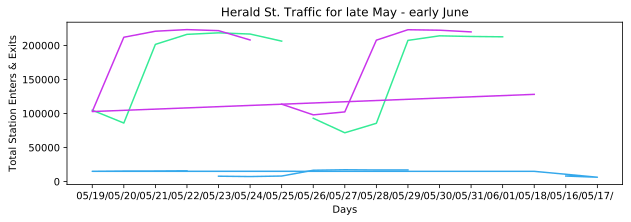

In [10]:
plt.figure(figsize=[10,3])

plt.title('Herald St. Traffic for late May - early June')
plt.xlabel('Days')
plt.ylabel('Total Station Enters & Exits')
plt.plot(herald_180526.DAY, herald_180526.TotalTraffic, color = '#34eb96')
plt.plot(herald_180602.DAY, herald_180602.TotalTraffic, color = '#34eb96')
plt.plot(herald_190525.DAY, herald_190525.TotalTraffic, color = '#c934eb')
plt.plot(herald_190601.DAY, herald_190601.TotalTraffic, color = '#c934eb')
plt.plot(herald_200523.DAY, herald_200523.TotalTraffic, color = '#34a8eb')
plt.plot(herald_200530.DAY, herald_200530.TotalTraffic, color = '#34a8eb');

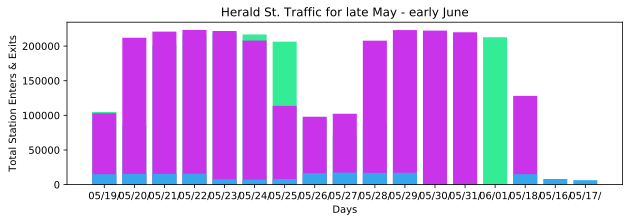

In [11]:
# Bar chart much easier to read than line!!
# Don't know why days are not in order?

plt.figure(figsize=[10,3])

plt.title('Herald St. Traffic for late May - early June')
plt.xlabel('Days')
plt.ylabel('Total Station Enters & Exits')
plt.bar(herald_180526.DAY, herald_180526.TotalTraffic, color = '#34eb96')
plt.bar(herald_180602.DAY, herald_180602.TotalTraffic, color = '#34eb96')
plt.bar(herald_190525.DAY, herald_190525.TotalTraffic, color = '#c934eb')
plt.bar(herald_190601.DAY, herald_190601.TotalTraffic, color = '#c934eb')
plt.bar(herald_200523.DAY, herald_200523.TotalTraffic, color = '#34a8eb')
plt.bar(herald_200530.DAY, herald_200530.TotalTraffic, color = '#34a8eb');

In [3]:
# This looks nice...but just need it to be accurate for months

width = 0.30

x = np.arange(len(herald_180526.DAY)) # this isn't the correct way to make the x labels! Just testing look

fig, ax = plt.subplots()
bar18 = ax.bar(x - width/2, herald_180526.TotalTraffic, width, label='2018', color='#869fb2ff')
bar19 = ax.bar(x + width/2, herald_190525.TotalTraffic, width, label='2019', color='#325d79ff')
bar20 = ax.bar(x + width, herald_200523.TotalTraffic, width, label='2020', color='#e81ce1')
plt.title('Subway Traffic Jan-June', size=17)
plt.legend(['2018','2019','2020'],shadow = True, loc = 0)
plt.xlabel("Months", size=12, family='serif')
plt.ylabel("Traffic (Entries + Exits)", size=12, family='arial')
ax.set_xticklabels(["n/a","Jan","Feb","Mar","Apr","May","June","July"])
plt.savefig('graphing.jpg', bbox_inches="tight");
plt.savefig('graphing.svg', bbox_inches="tight");

NameError: name 'np' is not defined

In [39]:
# Calculating percent change in average traffic in 2019 to 2020

change_percent = ((float(herald_200523.TotalTraffic.mean())
                   -herald_190525.TotalTraffic.mean())
                  /herald_190525.TotalTraffic.mean())*100

change_percent

-93.0709564253361